In [56]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns # matplotlib基础上的更高级的API的封装

In [27]:
# 读取数据
test = pd.read_csv("/Users/cyq/Kaggledata/Titanic/test.csv")
train = pd.read_csv("/Users/cyq/Kaggledata/Titanic/train.csv")
real_val = pd.read_csv("/Users/cyq/Kaggledata/Titanic/gender_submission.csv")

In [10]:
# 查看数据的前5行
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# 查看数据的信息
train.info()
print "—— —— —— —— —— —— —— —— —— —— —— —— ——"
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
—— —— —— —— —— —— —— —— —— —— —— —— ——
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null o

In [28]:
# (1)去掉对预测无用的信息列
train_1 = train.drop(['PassengerId','Name','Ticket'],axis=1)
test_1 = test.drop(['PassengerId','Name','Ticket'],axis=1)

In [62]:
# train_1的详细信息
train_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
test_1['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408    False
409    False
410    False
411    False
412    False
413    False
414    False
415    False
416    False
417    False
Name: Embarked, dtype: bool

In [46]:
# 判断缺失值的位置
train_1['Embarked'][train_1['Embarked'].isnull().values==True]
# 'Embarked'列的空值，用‘S’代替
train_1['Embarked'] = train_1['Embarked'].fillna('S')

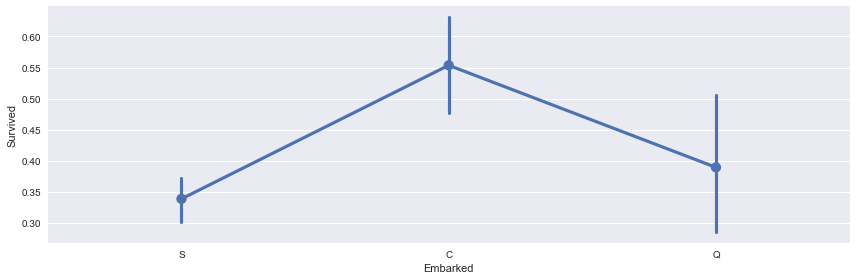

In [57]:
# 绘图
sns.factorplot('Embarked','Survived', data=train_1,size=4,aspect=3)

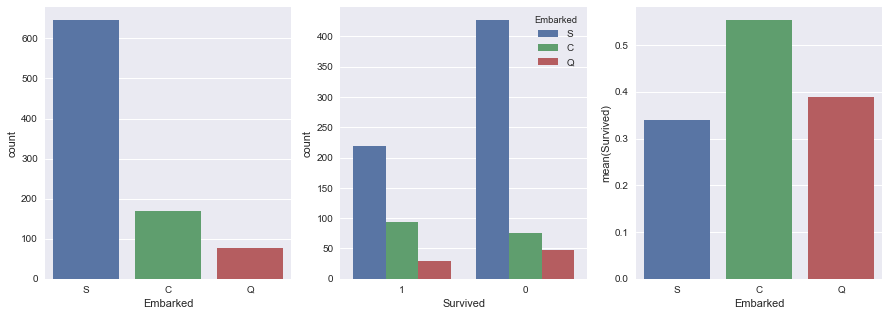

In [60]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=train_1, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_1, order=[1,0], ax=axis2)
embark_perc = train_1[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3) 